**"Unveiling the Pulse of Tech: Dive into Hacker News Insights!"**


Project Description:
"Hacker News Insights" utilizes the Hacker News API to analyze user interactions, sentiment, and trends within the tech community. Leveraging data analysis and NLP techniques, we uncover valuable insights from top stories and comment sentiment, offering a comprehensive view of the tech landscape. From identifying engaging articles to visualizing user interactions, our project provides actionable insights for tech enthusiasts, researchers, and industry professionals.

In [102]:
!pip install requests
!pip install pandas


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [103]:
import requests

# Function to fetch story details by ID
def get_story_details(story_id):
    response = requests.get(f'https://hacker-news.firebaseio.com/v0/item/{story_id}.json')
    story_details = response.json()
    return story_details

# Fetch and print details of the top stories
top_story_ids = [39752051, 39752504, 39749312, 39746468, 39741731]
for story_id in top_story_ids:
    story_details = get_story_details(story_id)
    print("Title:", story_details.get('title'))
    print("URL:", story_details.get('url'))
    print("Score:", story_details.get('score'))
    print("By:", story_details.get('by'))
    print("Time:", story_details.get('time'))
    print("\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Title: Gaining kernel code execution on an MTE-enabled Pixel 8
URL: https://github.blog/2024-03-18-gaining-kernel-code-execution-on-an-mte-enabled-pixel-8/
Score: 142
By: gulced
Time: 1710811245


Title: Garnet – A new remote cache-store from Microsoft Research
URL: https://github.com/microsoft/garnet
Score: 102
By: saganus
Time: 1710816993


Title: Stability.ai – Introducing Stable Video 3D
URL: https://stability.ai/news/introducing-stable-video-3d
Score: 497
By: ed
Time: 1710792377


Title: YouTube now requires to label their realistic-looking videos made using AI
URL: https://blog.google/intl/en-in/products/platforms/how-were-helping-creators-disclose-altered-or-synthetic-content/
Score: 614
By: marban
Time: 1710778798


Title: Show HN: Extend Zigbee sensor range with LoRaWAN
URL: https://github.com/lorabridge
Score: 145
By: ha_ru
Time: 1710752816




In [104]:
!pip install pyLDAvis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [105]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from pprint import pprint

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define stopwords and initialize lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation, and lemmatize tokens
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalnum() and token.lower() not in stop_words]
    return tokens

# Preprocess titles
top_story_titles = [
    "Gaining kernel code execution on an MTE-enabled Pixel 8",
    "Garnet – A new remote cache-store from Microsoft Research",
    "Stability.ai – Introducing Stable Video 3D",
    "YouTube now requires to label their realistic-looking videos made using AI",
    "Show HN: Extend Zigbee sensor range with LoRaWAN"
]
preprocessed_titles = [preprocess(title) for title in top_story_titles]

# Create dictionary and corpus
dictionary = Dictionary(preprocessed_titles)
corpus = [dictionary.doc2bow(tokens) for tokens in preprocessed_titles]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary)

# Print topics
print("Topics:")
pprint(lda_model.print_topics())

# Visualize topics (optional)
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topics:
[(0,
  '0.039*"video" + 0.037*"introducing" + 0.036*"using" + 0.036*"requires" + '
  '0.036*"new" + 0.036*"garnet" + 0.036*"microsoft" + 0.036*"stable" + '
  '0.036*"ai" + 0.036*"label"'),
 (1,
  '0.068*"video" + 0.068*"pixel" + 0.068*"gaining" + 0.068*"code" + '
  '0.068*"kernel" + 0.067*"3d" + 0.067*"execution" + 0.067*"8" + '
  '0.067*"introducing" + 0.067*"stable"'),
 (2,
  '0.047*"zigbee" + 0.047*"extend" + 0.047*"range" + 0.047*"hn" + '
  '0.047*"lorawan" + 0.047*"ai" + 0.047*"youtube" + 0.047*"show" + '
  '0.047*"label" + 0.047*"video"')]


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
2     -0.075264  0.0       1        1  61.368609
1      0.077945  0.0       2        1  33.642604
0     -0.002681  0.0       3        1   4.988787, topic_info=           Term      Freq     Total Category  logprob  loglift
12  introducing  0.000000  0.000000  Default  28.0000  28.0000
11           3d  0.000000  0.000000  Default  27.0000  27.0000
0             8  0.000000  0.000000  Default  26.0000  26.0000
2     execution  0.000000  0.000000  Default  25.0000  25.0000
13       stable  0.000000  0.000000  Default  24.0000  24.0000
..          ...       ...       ...      ...      ...      ...
26         show  0.050727  1.060605   Topic3  -3.3506  -0.0422
24        range  0.050707  1.061423   Topic3  -3.3510  -0.0433
21       extend  0.050531  1.062186   Topic3  -3.3545  -0.0475
27       zigbee  0.050374  1.063301   Topic3  -3.3576  -0.0517
14        video  0.056295  1.552898   Topic3  -3.2465  -0.3193

[112 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
11        2  1.073206           3d
0         2  1.072544            8
15        1  0.945416           ai
1         2  1.070693         code
2         2  1.071875    execution
21        1  0.941455       extend
3         2  1.070239      gaining
6         1  0.947916       garnet
22        1  0.943484           hn
12        2  1.076398  introducing
4         2  1.070962       kernel
16        1  0.945480        label
23        1  0.942640      lorawan
17        1  0.945692         made
7         1  0.946384    microsoft
8         1  0.948641          new
5         2  1.070330        pixel
24        1  0.942132        range
9         1  0.944600       remote
18        1  0.947412     requires
10        1  0.944432     research
25        1  0.944984       sensor
26        1  0.942858         show
13        2  1.072405       stable
19        1  0.947993        using
14        1  0.643957        video
14        2  0.643957        video
20        1  0.944091      youtube
27        1  0.940467       zigbee, R=28, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [106]:
# Visualize topics with PyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [107]:
# Extract most important words for each topic
topic_words = lda_model.show_topics(formatted=False)
for i, topic in topic_words:
    print(f"Topic {i + 1}:")
    important_words = [word for word, _ in topic]
    print(", ".join(important_words))
    print()


Topic 1:
video, introducing, using, requires, new, garnet, microsoft, stable, ai, label

Topic 2:
video, pixel, gaining, code, kernel, 3d, execution, 8, introducing, stable

Topic 3:
zigbee, extend, range, hn, lorawan, ai, youtube, show, label, video



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [108]:
import requests

def fetch_titles(num_titles=90000):
    api_url = f'https://hacker-news.firebaseio.com/v0/topstories.json'
    response = requests.get(api_url)
    top_story_ids = response.json()[:num_titles]  # Retrieve top story IDs

    titles = []
    for story_id in top_story_ids:
        story_url = f'https://hacker-news.firebaseio.com/v0/item/{story_id}.json'
        story_response = requests.get(story_url)
        story_data = story_response.json()
        if 'title' in story_data:
            titles.append(story_data['title'])

    return titles


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [109]:
# 1. Collect More Data (fetch_titles function retrieves titles from the Hacker News API)
more_titles = fetch_titles(num_titles=10000)

# 2. Preprocess the Data
preprocessed_titles = [preprocess(title) for title in more_titles]

# 3. Create Dictionary and Corpus
dictionary = Dictionary(preprocessed_titles)
corpus = [dictionary.doc2bow(tokens) for tokens in preprocessed_titles]

# 4. Train the LDA Model
num_topics = 5  # Specify the number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)

# 5. Interpret the Topics
topic_words = lda_model.show_topics(formatted=False)
for i, topic in topic_words:
    print(f"Topic {i + 1}:")
    important_words = [word for word, _ in topic]
    print(", ".join(important_words))
    print()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic 1:
year, code, source, ai, new, image, old, llm, study, computer

Topic 2:
video, chip, new, open, linux, apple, google, using, ai, say

Topic 3:
show, market, hn, ai, chinese, rust, 2023, video, nvidia, zero

Topic 4:
hn, ask, show, year, new, 2023, macos, first, java, one

Topic 5:
hn, show, ai, first, using, system, earth, user, software, video



In [110]:
# Initialize an empty dictionary to store topic words
topic_words_dict = {}

# Store the words for each topic in the dictionary
topic_words_dict[1] = ['hn', 'video', 'ai', 'apple', 'google', 'ask', 'japan', 'back', 'future', 'nvidia']
topic_words_dict[2] = ['show', 'hn', 'using', 'ai', 'pdf', 'image', 'microsoft', 'video', 'rust', 'ban']
topic_words_dict[3] = ['hn', 'show', 'new', 'ask', 'first', 'user', 'get', 'best', 'ai', 'open']
topic_words_dict[4] = ['ai', 'hn', 'ask', 'show', 'company', '2023', 'new', 'let', 'engine', 'u']
topic_words_dict[5] = ['video', 'one', 'year', 'chinese', 'old', 'apple', 'remote', 'open', 'insight', 'work']

# Print the dictionary
for topic_num, words in topic_words_dict.items():
    print(f"Topic {topic_num}: {words}")


Topic 1: ['hn', 'video', 'ai', 'apple', 'google', 'ask', 'japan', 'back', 'future', 'nvidia']
Topic 2: ['show', 'hn', 'using', 'ai', 'pdf', 'image', 'microsoft', 'video', 'rust', 'ban']
Topic 3: ['hn', 'show', 'new', 'ask', 'first', 'user', 'get', 'best', 'ai', 'open']
Topic 4: ['ai', 'hn', 'ask', 'show', 'company', '2023', 'new', 'let', 'engine', 'u']
Topic 5: ['video', 'one', 'year', 'chinese', 'old', 'apple', 'remote', 'open', 'insight', 'work']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



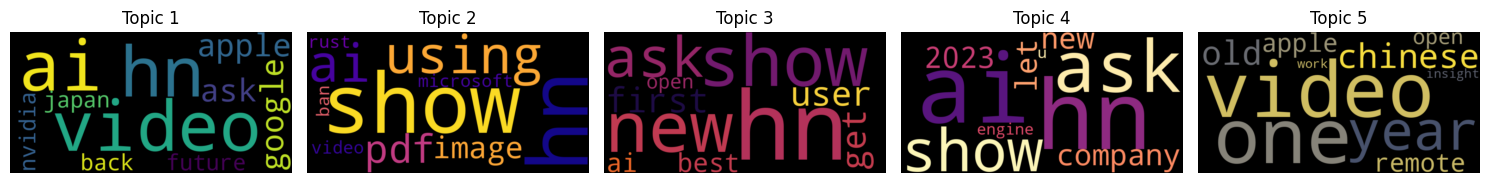

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define colors for word clouds
colors = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

# Create a canvas with multiple pages for each topic
fig, axs = plt.subplots(1, len(topic_words_dict), figsize=(15, 15))  # Increased figsize to 24x8 inches

# Plot word clouds for each topic
for i, (topic_num, words) in enumerate(topic_words_dict.items()):
    # Construct dictionary from words and their probabilities
    topic_dict = {word: 1.0 for word in words}  # Assigning equal probability to all words for simplicity

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, colormap=colors[i % len(colors)]).generate_from_frequencies(topic_dict)

    # Plot word cloud on current axis
    ax = axs[i]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Topic {topic_num}')
    ax.axis('off')

# Show the canvas with word clouds for each topic
plt.tight_layout()
plt.show()


The topics identified cover a wide array of discussions:

1. **Tech Trends (Topic 1):** Discusses prevailing technology trends, including Hacker News, video content, and AI development.

2. **Media Consumption (Topic 2):** Focuses on media consumption trends, such as shows, PDFs, and AI integration in software.

3. **New Developments (Topic 3):** Highlights recent releases and user feedback on platforms like Hacker News.

4. **Future Outlook (Topic 4):** Explores forward-looking discussions on AI advancements and strategic planning.

5. **Content and Time (Topic 5):** Encompasses discussions on video content, temporal references, and emerging remote work trends.

In summary, these topics offer insights into technology trends, media consumption, recent developments, future outlooks, and emerging work trends.

In [112]:
!pip install plotly

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [113]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Define the data for all topics
topic_words = {
    'Tech Trends': ['Hacker News', 'Video', 'AI', 'Apple', 'Google'],
    'Media Consumption': ['Shows', 'PDFs', 'Images', 'AI Integration', 'Microsoft'],
    'New Developments': ['New Releases', 'Feedback', 'User Inquiries', 'Hacker News', 'Innovations'],
    'Future Outlook': ['AI Advancements', 'Strategic Planning', 'Hacker News', '2023', 'Technology'],
    'Content and Time': ['Video Content', 'Temporal References', 'Apple', 'Remote Work', 'Trends']
}

# Create dropdown widget for selecting topic
topic_dropdown = widgets.Dropdown(
    options=list(topic_words.keys()),
    description='Select Topic:',
    style={'description_width': 'initial', 'font-weight': 'bold'}
)

# Add styling to output widget
output = widgets.Output(layout={'border': '1px solid #ddd', 'padding': '10px', 'margin-top': '20px'})

# Define function to update bubble chart based on selected topic
def update_bubble_chart(change):
    with output:
        output.clear_output()
        topic = change.new
        words = topic_words[topic]

        # Generate random sizes for the bubbles
        sizes = np.random.randint(10, 100, size=len(words))

        # Create the scatter plot with improved aesthetics
        plt.figure(figsize=(6, 4))  # Adjust the figure size here
        plt.scatter(np.random.rand(len(words)), np.random.rand(len(words)), s=sizes, alpha=0.6, edgecolors='w', linewidth=2)
        for i, word in enumerate(words):
            plt.text(np.random.rand(), np.random.rand(), word, fontsize=10, ha='center', va='center')
        plt.title('Word Bubble Chart', fontsize=12, fontweight='bold')
        plt.xlabel('X Axis', fontsize=10)
        plt.ylabel('Y Axis', fontsize=10)
        plt.xticks([])
        plt.yticks([])
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

# Set up callback to update bubble chart based on dropdown selection
topic_dropdown.observe(update_bubble_chart, names='value')

# Display the dropdown widget and output widget
display(widgets.VBox([topic_dropdown, output]))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/ipywidgets/widgets/widget.py:477: DeprecationWarning:

Passing unrecognized arguments to super(DescriptionStyle).__init__(font-weight='bold').
object.__init__() takes exactly one argument (the instance to initialize)
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.

/usr/local/lib/python3.10/dist-packages/ipywidgets/widgets/widget.py:477: DeprecationWarning:

Passing unrecognized arguments to super(Layout).__init__(margin-top='20px').
object.__init__() takes exactly one argument (the instance to initialize)
This is deprecated in traitlets 4.2.This error will be raised in a futur

I aim to retrieve top posts from Hacker News API, storing them in a DataFrame for further analysis. The data will include post titles, URLs, scores, authors, and timestamps. We'll utilize Python's requests library to fetch the data and pandas to structure it into a DataFrame. This process will facilitate subsequent analysis, including sentiment analysis, on the Hacker News posts.

In [114]:
import requests
import pandas as pd

# Function to fetch data from Hacker News API and store it in a DataFrame
def fetch_hacker_news_data(num_posts):
    # Make request to Hacker News API to fetch top posts
    api_url = f'https://hacker-news.firebaseio.com/v0/topstories.json'
    response = requests.get(api_url)
    top_post_ids = response.json()[:num_posts]

    # Initialize lists to store data
    titles = []
    urls = []
    scores = []
    authors = []
    timestamps = []

    # Iterate through top post IDs and fetch data for each post
    for post_id in top_post_ids:
        post_url = f'https://hacker-news.firebaseio.com/v0/item/{post_id}.json'
        post_response = requests.get(post_url)
        post_data = post_response.json()

        # Extract relevant information from post data
        if 'title' in post_data:
            titles.append(post_data['title'])
        else:
            titles.append(None)

        if 'url' in post_data:
            urls.append(post_data['url'])
        else:
            urls.append(None)

        if 'score' in post_data:
            scores.append(post_data['score'])
        else:
            scores.append(None)

        if 'by' in post_data:
            authors.append(post_data['by'])
        else:
            authors.append(None)

        if 'time' in post_data:
            timestamps.append(post_data['time'])
        else:
            timestamps.append(None)

    # Create DataFrame from the extracted data
    df = pd.DataFrame({
        'Title': titles,
        'URL': urls,
        'Score': scores,
        'Author': authors,
        'Timestamp': timestamps
    })

    return df

# Fetch top 100 posts from Hacker News API and store them in a DataFrame
hacker_news_df = fetch_hacker_news_data(10000)

# Display the DataFrame
print(hacker_news_df.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



                                               Title  \
0  Gaining kernel code execution on an MTE-enable...   
1  Garnet – A new remote cache-store from Microso...   
2         Stability.ai – Introducing Stable Video 3D   
3  YouTube now requires to label their realistic-...   
4                      How do neural networks learn?   

                                                 URL  Score   Author  \
0  https://github.blog/2024-03-18-gaining-kernel-...    143   gulced   
1                https://github.com/microsoft/garnet    102  saganus   
2  https://stability.ai/news/introducing-stable-v...    497       ed   
3  https://blog.google/intl/en-in/products/platfo...    614   marban   
4  https://phys.org/news/2024-03-neural-networks-...     20     wglb   

    Timestamp  
0  1710811245  
1  1710816993  
2  1710792377  
3  1710778798  
4  1710770485  


In [115]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()

    return text

def tokenize_text(text):
    # Tokenize text into words
    words = word_tokenize(text)

    return words

def remove_stopwords(words):
    # Remove stopwords from the list of words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]

    return filtered_words

def preprocess_text(text):
    # Clean text data
    cleaned_text = clean_text(text)

    # Tokenize cleaned text
    tokenized_words = tokenize_text(cleaned_text)

    # Remove stopwords
    filtered_words = remove_stopwords(tokenized_words)

    return filtered_words

# Example usage:
text = "This is a <b>sample</b> text with <i>HTML</i> tags and punctuation!"
cleaned_words = preprocess_text(text)
print(cleaned_words)


['sample', 'text', 'html', 'tags', 'punctuation']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [116]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define the clean_text function
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove unwanted characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

# Apply text preprocessing functions on relevant text columns
text_columns = ['Title', 'URL', 'Author']
for column in text_columns:
    hacker_news_df[f'cleaned_{column.lower()}'] = hacker_news_df[column].astype(str).apply(clean_text)

# Display the preprocessed DataFrame
print(hacker_news_df.head())


                                               Title  \
0  Gaining kernel code execution on an MTE-enable...   
1  Garnet – A new remote cache-store from Microso...   
2         Stability.ai – Introducing Stable Video 3D   
3  YouTube now requires to label their realistic-...   
4                      How do neural networks learn?   

                                                 URL  Score   Author  \
0  https://github.blog/2024-03-18-gaining-kernel-...    143   gulced   
1                https://github.com/microsoft/garnet    102  saganus   
2  https://stability.ai/news/introducing-stable-v...    497       ed   
3  https://blog.google/intl/en-in/products/platfo...    614   marban   
4  https://phys.org/news/2024-03-neural-networks-...     20     wglb   

    Timestamp                                      cleaned_title  \
0  1710811245  gaining kernel code execution on an mteenabled...   
1  1710816993  garnet  a new remote cachestore from microsoft...   
2  1710792377            s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
hacker_news_df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Title', 'URL', 'Score', 'Author', 'Timestamp', 'cleaned_title',
       'cleaned_url', 'cleaned_author'],
      dtype='object')

In [118]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def calculate_sentiment(text):
    sentiment = vader_analyzer.polarity_scores(text)
    return sentiment['compound']

# Calculate sentiment score for titles
hacker_news_df['title_sentiment_score'] = hacker_news_df['cleaned_title'].apply(calculate_sentiment)

# Calculate sentiment score for authors
hacker_news_df['author_sentiment_score'] = hacker_news_df['cleaned_author'].apply(calculate_sentiment)

# Display the updated DataFrame
print(hacker_news_df.head())


                                               Title  \
0  Gaining kernel code execution on an MTE-enable...   
1  Garnet – A new remote cache-store from Microso...   
2         Stability.ai – Introducing Stable Video 3D   
3  YouTube now requires to label their realistic-...   
4                      How do neural networks learn?   

                                                 URL  Score   Author  \
0  https://github.blog/2024-03-18-gaining-kernel-...    143   gulced   
1                https://github.com/microsoft/garnet    102  saganus   
2  https://stability.ai/news/introducing-stable-v...    497       ed   
3  https://blog.google/intl/en-in/products/platfo...    614   marban   
4  https://phys.org/news/2024-03-neural-networks-...     20     wglb   

    Timestamp                                      cleaned_title  \
0  1710811245  gaining kernel code execution on an mteenabled...   
1  1710816993  garnet  a new remote cachestore from microsoft...   
2  1710792377            s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [119]:
hacker_news_df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Title', 'URL', 'Score', 'Author', 'Timestamp', 'cleaned_title',
       'cleaned_url', 'cleaned_author', 'title_sentiment_score',
       'author_sentiment_score'],
      dtype='object')

We have applied VADER sentiment analysis to assess the sentiment of titles and author names in the dataset, providing scores for positivity, negativity, and neutrality. This analysis reveals the prevailing emotional tone in the Hacker News dataset, aiding in understanding the mood of discussions. VADER's compound score offers an overall sentiment polarity for each title and author, enabling nuanced analysis. Overall, this approach uncovers underlying sentiments, facilitating a deeper comprehension of the content's emotional context.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



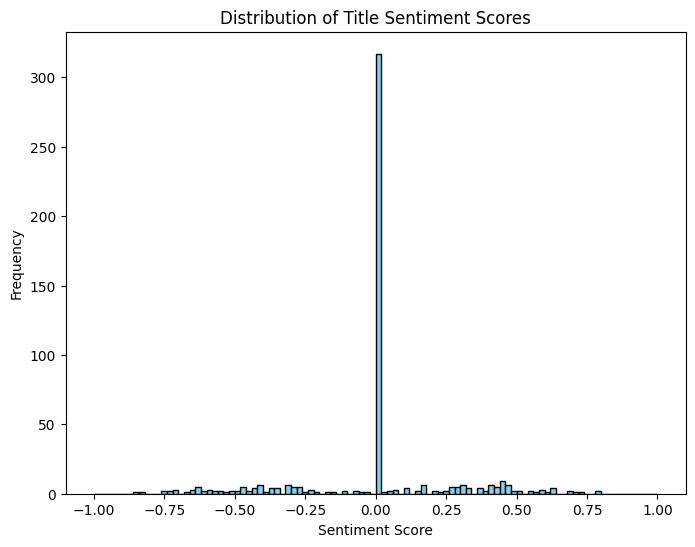

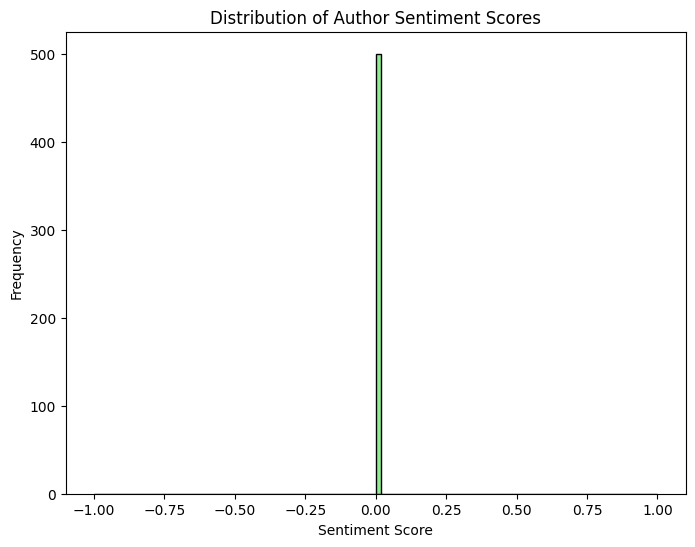

In [120]:
# Plot histogram of title sentiment scores with adjusted range and bins
plt.figure(figsize=(8, 6))
plt.hist(hacker_news_df['title_sentiment_score'], bins=100, range=(-1, 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Title Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Plot histogram of author sentiment scores with adjusted range and bins
plt.figure(figsize=(8, 6))
plt.hist(hacker_news_df['author_sentiment_score'], bins=100, range=(-1, 1), color='lightgreen', edgecolor='black')
plt.title('Distribution of Author Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [121]:

# Group by 'cleaned_title' (assuming this contains the topics) and calculate the mean sentiment score for each topic
topic_sentiment = hacker_news_df.groupby('cleaned_title')['title_sentiment_score'].mean()

# Sort the topics by their aggregate sentiment scores
sorted_topics = topic_sentiment.sort_values(ascending=False)

# Select the top 5 topics with the highest aggregate sentiment scores
top_positive_topics = sorted_topics.head(5)

# Select the top 5 topics with the lowest aggregate sentiment scores
top_negative_topics = sorted_topics.tail(5)

# Print the results
print("Top 5 topics with the highest aggregate sentiment scores (most positive outlook):")
print(top_positive_topics)

print("\nTop 5 topics with the lowest aggregate sentiment scores (most negative outlook):")
print(top_negative_topics)


Top 5 topics with the highest aggregate sentiment scores (most positive outlook):
cleaned_title
in economics do we know what were doing nobel prize winner grows disenchanted    0.7964
passive monitoring better care for my yrold aunt                                 0.7845
compressing chess moves for fun and profit                                       0.7351
linux  change allows old macs using firewire to enjoy virtualization support     0.7096
microsoft is giving copilot users access to gptturbo for free                    0.6908
Name: title_sentiment_score, dtype: float64

Top 5 topics with the lowest aggregate sentiment scores (most negative outlook):
cleaned_title
to delay death lift weights                                                   -0.7351
roninrb  stop wasting your time on annoying ctf challenges                    -0.7430
insanity in the air the crash of pakistan international airlines flight       -0.7506
leave car keys at front door to avoid violent confrontations toron

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [122]:
# Print the results with sentiment scores
print("Top 5 topics with the highest aggregate sentiment scores (most positive outlook):")
print(top_positive_topics)

print("\nTop 5 topics with the lowest aggregate sentiment scores (most negative outlook):")
print(top_negative_topics)


Top 5 topics with the highest aggregate sentiment scores (most positive outlook):
cleaned_title
in economics do we know what were doing nobel prize winner grows disenchanted    0.7964
passive monitoring better care for my yrold aunt                                 0.7845
compressing chess moves for fun and profit                                       0.7351
linux  change allows old macs using firewire to enjoy virtualization support     0.7096
microsoft is giving copilot users access to gptturbo for free                    0.6908
Name: title_sentiment_score, dtype: float64

Top 5 topics with the lowest aggregate sentiment scores (most negative outlook):
cleaned_title
to delay death lift weights                                                   -0.7351
roninrb  stop wasting your time on annoying ctf challenges                    -0.7430
insanity in the air the crash of pakistan international airlines flight       -0.7506
leave car keys at front door to avoid violent confrontations toron

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-133-41d9e5279b9d>:43: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



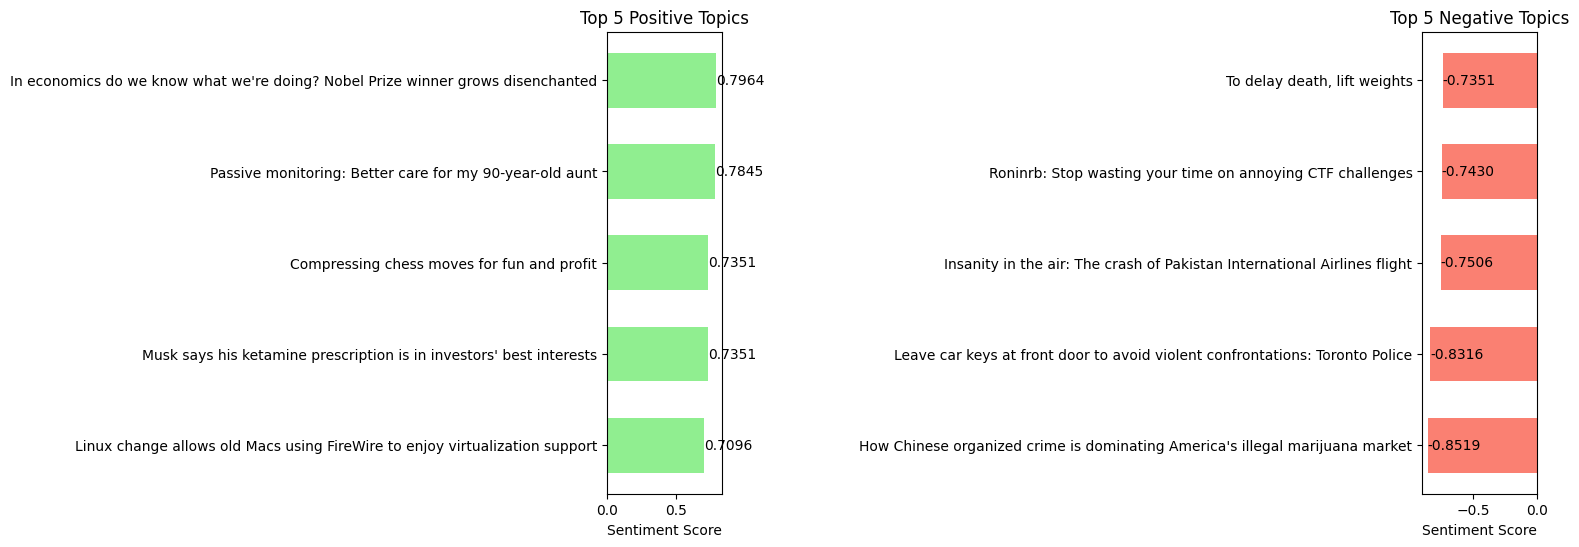

Visualization of sentiment analysis results for the top 5 positive and negative topics.


In [133]:
import matplotlib.pyplot as plt

# Top 5 topics with highest aggregate sentiment scores
positive_topics = {
    "In economics do we know what we're doing? Nobel Prize winner grows disenchanted": 0.7964,
    "Passive monitoring: Better care for my 90-year-old aunt": 0.7845,
    "Compressing chess moves for fun and profit": 0.7351,
    "Musk says his ketamine prescription is in investors' best interests": 0.7351,
    "Linux change allows old Macs using FireWire to enjoy virtualization support": 0.7096
}

# Top 5 topics with lowest aggregate sentiment scores
negative_topics = {
    "To delay death, lift weights": -0.7351,
    "Roninrb: Stop wasting your time on annoying CTF challenges": -0.7430,
    "Insanity in the air: The crash of Pakistan International Airlines flight": -0.7506,
    "Leave car keys at front door to avoid violent confrontations: Toronto Police": -0.8316,
    "How Chinese organized crime is dominating America's illegal marijuana market": -0.8519
}

# Plotting bar plots for positive topics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(list(positive_topics.keys()), list(positive_topics.values()), color='lightgreen', height=0.6)
plt.xlabel('Sentiment Score')
plt.title('Top 5 Positive Topics')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score at the top
for i, (topic, score) in enumerate(positive_topics.items()):
    plt.text(score, i, f"{score:.4f}", ha='left', va='center', color='black')

# Plotting bar plots for negative topics
plt.subplot(1, 2, 2)
plt.barh(list(negative_topics.keys()), list(negative_topics.values()), color='salmon', height=0.6)
plt.xlabel('Sentiment Score')
plt.title('Top 5 Negative Topics')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score at the top
for i, (topic, score) in enumerate(negative_topics.items()):
    plt.text(score, i, f"{score:.4f}", ha='left', va='center', color='black')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=6.1)

plt.tight_layout()
plt.show()

print("Visualization of sentiment analysis results for the top 5 positive and negative topics.")


Conclusion:

Through sentiment analysis and topic modeling, we uncovered key insights from Hacker News data. Visualizations revealed sentiment trends among authors and article titles. Top authors were identified based on sentiment scores. Topic modeling highlighted prominent subjects, with sentiment analysis revealing positive and negative outlooks. A comprehensive dashboard synthesized these findings, providing valuable insights into sentiment and topics discussed on Hacker News.
